<a href="https://colab.research.google.com/github/anikch/Face-emotion-detection-using-CNN/blob/main/Emotion_Detection_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Reading data and data pre-processing

In [2]:
# Reading data from CSV
df= pd.read_csv('/content/drive/MyDrive/colab_data/fer2013.csv')
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [3]:
# Creating array of pixels 
images= df.pixels.tolist()
X=[]
for img in images:
  X.append(img.split(' '))
X= np.array(X, dtype= np.float32)
X.shape

(35887, 2304)

In [4]:
# Splitting X into training and testinging dataset and reshaping
training_idx= df[df.Usage== 'Training'].index
testing_idx= df[df.Usage != 'Training'].index
X_train= X[training_idx,:].reshape(-1,48,48)
X_test= X[testing_idx,:].reshape(-1,48,48)
X_train.shape, X_test.shape

((28709, 48, 48), (7178, 48, 48))

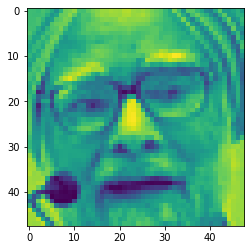

In [5]:
# Plotting sample image
plt.imshow(X_train[1,:,:])

In [6]:
# Normalizing data
X_train= X_train / 255
X_test= X_test / 255

In [7]:
# Preparing target for train and test
y= df.emotion.values
y_train= y[training_idx].reshape(-1,1)
y_test= y[testing_idx].reshape(-1,1)
y_train.shape, y_test.shape

((28709, 1), (7178, 1))

In [8]:
# Checking unique categories in y_test and y_train
np.unique(y_train), np.unique(y_test)

(array([0, 1, 2, 3, 4, 5, 6]), array([0, 1, 2, 3, 4, 5, 6]))

In [9]:
# Performing One-hot encoding of 7 labels
Y_train= tf.keras.utils.to_categorical(y_train, 7) 
Y_test= tf.keras.utils.to_categorical(y_test, 7)

In [10]:
# Checking final shape of target
Y_train.shape, Y_test.shape

((28709, 7), (7178, 7))

# Model Building

## Model 1

In [11]:
# Creating model1
model1= tf.keras.Sequential()
model1.add(tf.keras.layers.Conv2D(filters= 64, kernel_size= (5,5), input_shape= (48,48,1), activation= 'relu'))
model1.add(tf.keras.layers.Conv2D(filters= 64, kernel_size= (5,5), activation= 'relu'))
model1.add(tf.keras.layers.BatchNormalization())
model1.add(tf.keras.layers.MaxPooling2D((2, 2)))


model1.add(tf.keras.layers.Conv2D(filters= 128, kernel_size= (5,5), activation= 'relu'))
model1.add(tf.keras.layers.Conv2D(filters= 128, kernel_size= (5,5), activation= 'relu'))
model1.add(tf.keras.layers.BatchNormalization())
model1.add(tf.keras.layers.MaxPooling2D((2, 2)))


model1.add(tf.keras.layers.Conv2D(filters= 256, kernel_size= (3,3), activation= 'relu'))
model1.add(tf.keras.layers.Conv2D(filters= 256, kernel_size= (3,3), activation= 'relu'))
model1.add(tf.keras.layers.BatchNormalization())
model1.add(tf.keras.layers.MaxPooling2D((2, 2)))


model1.add(tf.keras.layers.Flatten())
model1.add(tf.keras.layers.Dense(128, activation='relu'))
model1.add(tf.keras.layers.BatchNormalization())
model1.add(tf.keras.layers.Dropout(.25))
model1.add(tf.keras.layers.Dense(7, activation= 'softmax'))

In [12]:
# Checking model summary
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 44, 44, 64)        1664      
                                                                 
 conv2d_1 (Conv2D)           (None, 40, 40, 64)        102464    
                                                                 
 batch_normalization (BatchN  (None, 40, 40, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 20, 20, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       204928    
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 128)       4

In [13]:
# Compiling model
model1.compile(loss= 'categorical_crossentropy', optimizer= 'adam', metrics= ['accuracy'])

In [14]:
# Fit the model
history1= model1.fit(X_train, Y_train, epochs= 100,  batch_size= 64, validation_split= .2)

Epoch 1/100
359/359 [==============================] - 8s 17ms/step - loss: 1.9429 - accuracy: 0.2692 - val_loss: 1.7935 - val_accuracy: 0.2524
Epoch 2/100
359/359 [==============================] - 6s 15ms/step - loss: 1.6039 - accuracy: 0.3856 - val_loss: 1.6760 - val_accuracy: 0.3760
Epoch 3/100
359/359 [==============================] - 6s 15ms/step - loss: 1.3873 - accuracy: 0.4664 - val_loss: 1.4188 - val_accuracy: 0.4601
Epoch 4/100
359/359 [==============================] - 6s 16ms/step - loss: 1.2348 - accuracy: 0.5301 - val_loss: 1.2126 - val_accuracy: 0.5362
Epoch 5/100
359/359 [==============================] - 6s 15ms/step - loss: 1.1313 - accuracy: 0.5705 - val_loss: 1.2561 - val_accuracy: 0.5225
Epoch 6/100
359/359 [==============================] - 6s 15ms/step - loss: 1.0461 - accuracy: 0.6040 - val_loss: 1.2853 - val_accuracy: 0.5096
Epoch 7/100
359/359 [==============================] - 6s 15ms/step - loss: 0.9581 - accuracy: 0.6404 - val_loss: 1.1946 - val_accuracy:

Model is clearly overfitting. Creating next model with Dropout layers in convolution layers and adding padding= 'same' in MaxPooling.

## Model 2

In [15]:
# Creating model2 - Adding Dropout layers in convolution layers and adding padding= 'same' in MaxPooling

model2= tf.keras.Sequential()
model2.add(tf.keras.layers.Conv2D(filters= 64, kernel_size= (5,5), input_shape= (48,48,1), activation= 'relu'))
model2.add(tf.keras.layers.Conv2D(filters= 64, kernel_size= (5,5), activation= 'relu'))
model2.add(tf.keras.layers.BatchNormalization())
model2.add(tf.keras.layers.MaxPooling2D((2, 2), padding= 'same'))
model2.add(tf.keras.layers.Dropout(.5))

model2.add(tf.keras.layers.Conv2D(filters= 128, kernel_size= (5,5), activation= 'relu'))
model2.add(tf.keras.layers.Conv2D(filters= 128, kernel_size= (5,5), activation= 'relu'))
model2.add(tf.keras.layers.BatchNormalization())
model2.add(tf.keras.layers.MaxPooling2D((2, 2), padding= 'same'))
model2.add(tf.keras.layers.Dropout(.5))

model2.add(tf.keras.layers.Conv2D(filters= 256, kernel_size= (3,3), activation= 'relu'))
model2.add(tf.keras.layers.Conv2D(filters= 256, kernel_size= (3,3), activation= 'relu'))
model2.add(tf.keras.layers.BatchNormalization())
model2.add(tf.keras.layers.MaxPooling2D((2, 2), padding= 'same'))
model2.add(tf.keras.layers.Dropout(.5))

model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dense(128, activation='relu'))
model2.add(tf.keras.layers.BatchNormalization())
model2.add(tf.keras.layers.Dropout(.3))
model2.add(tf.keras.layers.Dense(7, activation= 'softmax'))

# Checking model summary
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 44, 44, 64)        1664      
                                                                 
 conv2d_7 (Conv2D)           (None, 40, 40, 64)        102464    
                                                                 
 batch_normalization_4 (Batc  (None, 40, 40, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 20, 20, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 20, 20, 64)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 128)      

In [16]:
# Compiling model
# To prevent over fitting we will stop the learning after 10 epochs and val_loss value not decreased
model2.compile(loss= 'categorical_crossentropy', optimizer= 'adam', metrics= ['accuracy'])

# Fit the model: 200 epochs with early stopping
early_stopping= tf.keras.callbacks.EarlyStopping(monitor= 'val_loss', min_delta= .001, mode= 'min', patience= 10)
callbacks= [early_stopping]
history2= model2.fit(X_train, Y_train, epochs= 200,  batch_size= 64, validation_split= .2, callbacks= callbacks)

Epoch 1/200
359/359 [==============================] - 7s 17ms/step - loss: 2.1055 - accuracy: 0.2085 - val_loss: 1.8069 - val_accuracy: 0.2546
Epoch 2/200
359/359 [==============================] - 6s 16ms/step - loss: 1.7912 - accuracy: 0.2878 - val_loss: 1.9510 - val_accuracy: 0.2724
Epoch 3/200
359/359 [==============================] - 6s 16ms/step - loss: 1.6336 - accuracy: 0.3523 - val_loss: 2.1944 - val_accuracy: 0.2638
Epoch 4/200
359/359 [==============================] - 6s 16ms/step - loss: 1.5274 - accuracy: 0.4051 - val_loss: 1.6014 - val_accuracy: 0.3755
Epoch 5/200
359/359 [==============================] - 6s 16ms/step - loss: 1.4396 - accuracy: 0.4431 - val_loss: 1.4095 - val_accuracy: 0.4582
Epoch 6/200
359/359 [==============================] - 6s 16ms/step - loss: 1.3753 - accuracy: 0.4688 - val_loss: 1.3156 - val_accuracy: 0.4915
Epoch 7/200
359/359 [==============================] - 6s 16ms/step - loss: 1.3179 - accuracy: 0.4936 - val_loss: 1.2472 - val_accuracy:

In [17]:
# Evaluating the model on test dataset
model2.evaluate(X_test, Y_test)

225/225 [==============================] - 1s 5ms/step - loss: 1.1525 - accuracy: 0.5942


[1.1524676084518433, 0.5941766500473022]

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


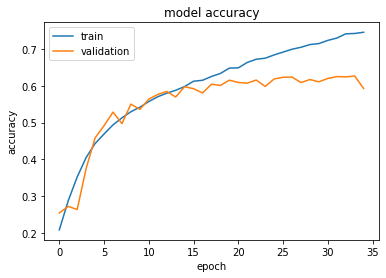

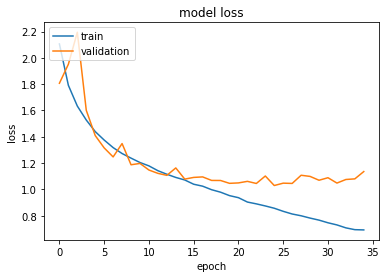

In [19]:
# list all data in training
print(history2.history.keys())
# summarize training for accuracy
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

Our custom CNN model is showing only 60% accuracy on testing dataset.